In [1]:
#import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [2]:
#load dataset
df=pd.read_csv(r"E:/wine.csv")

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


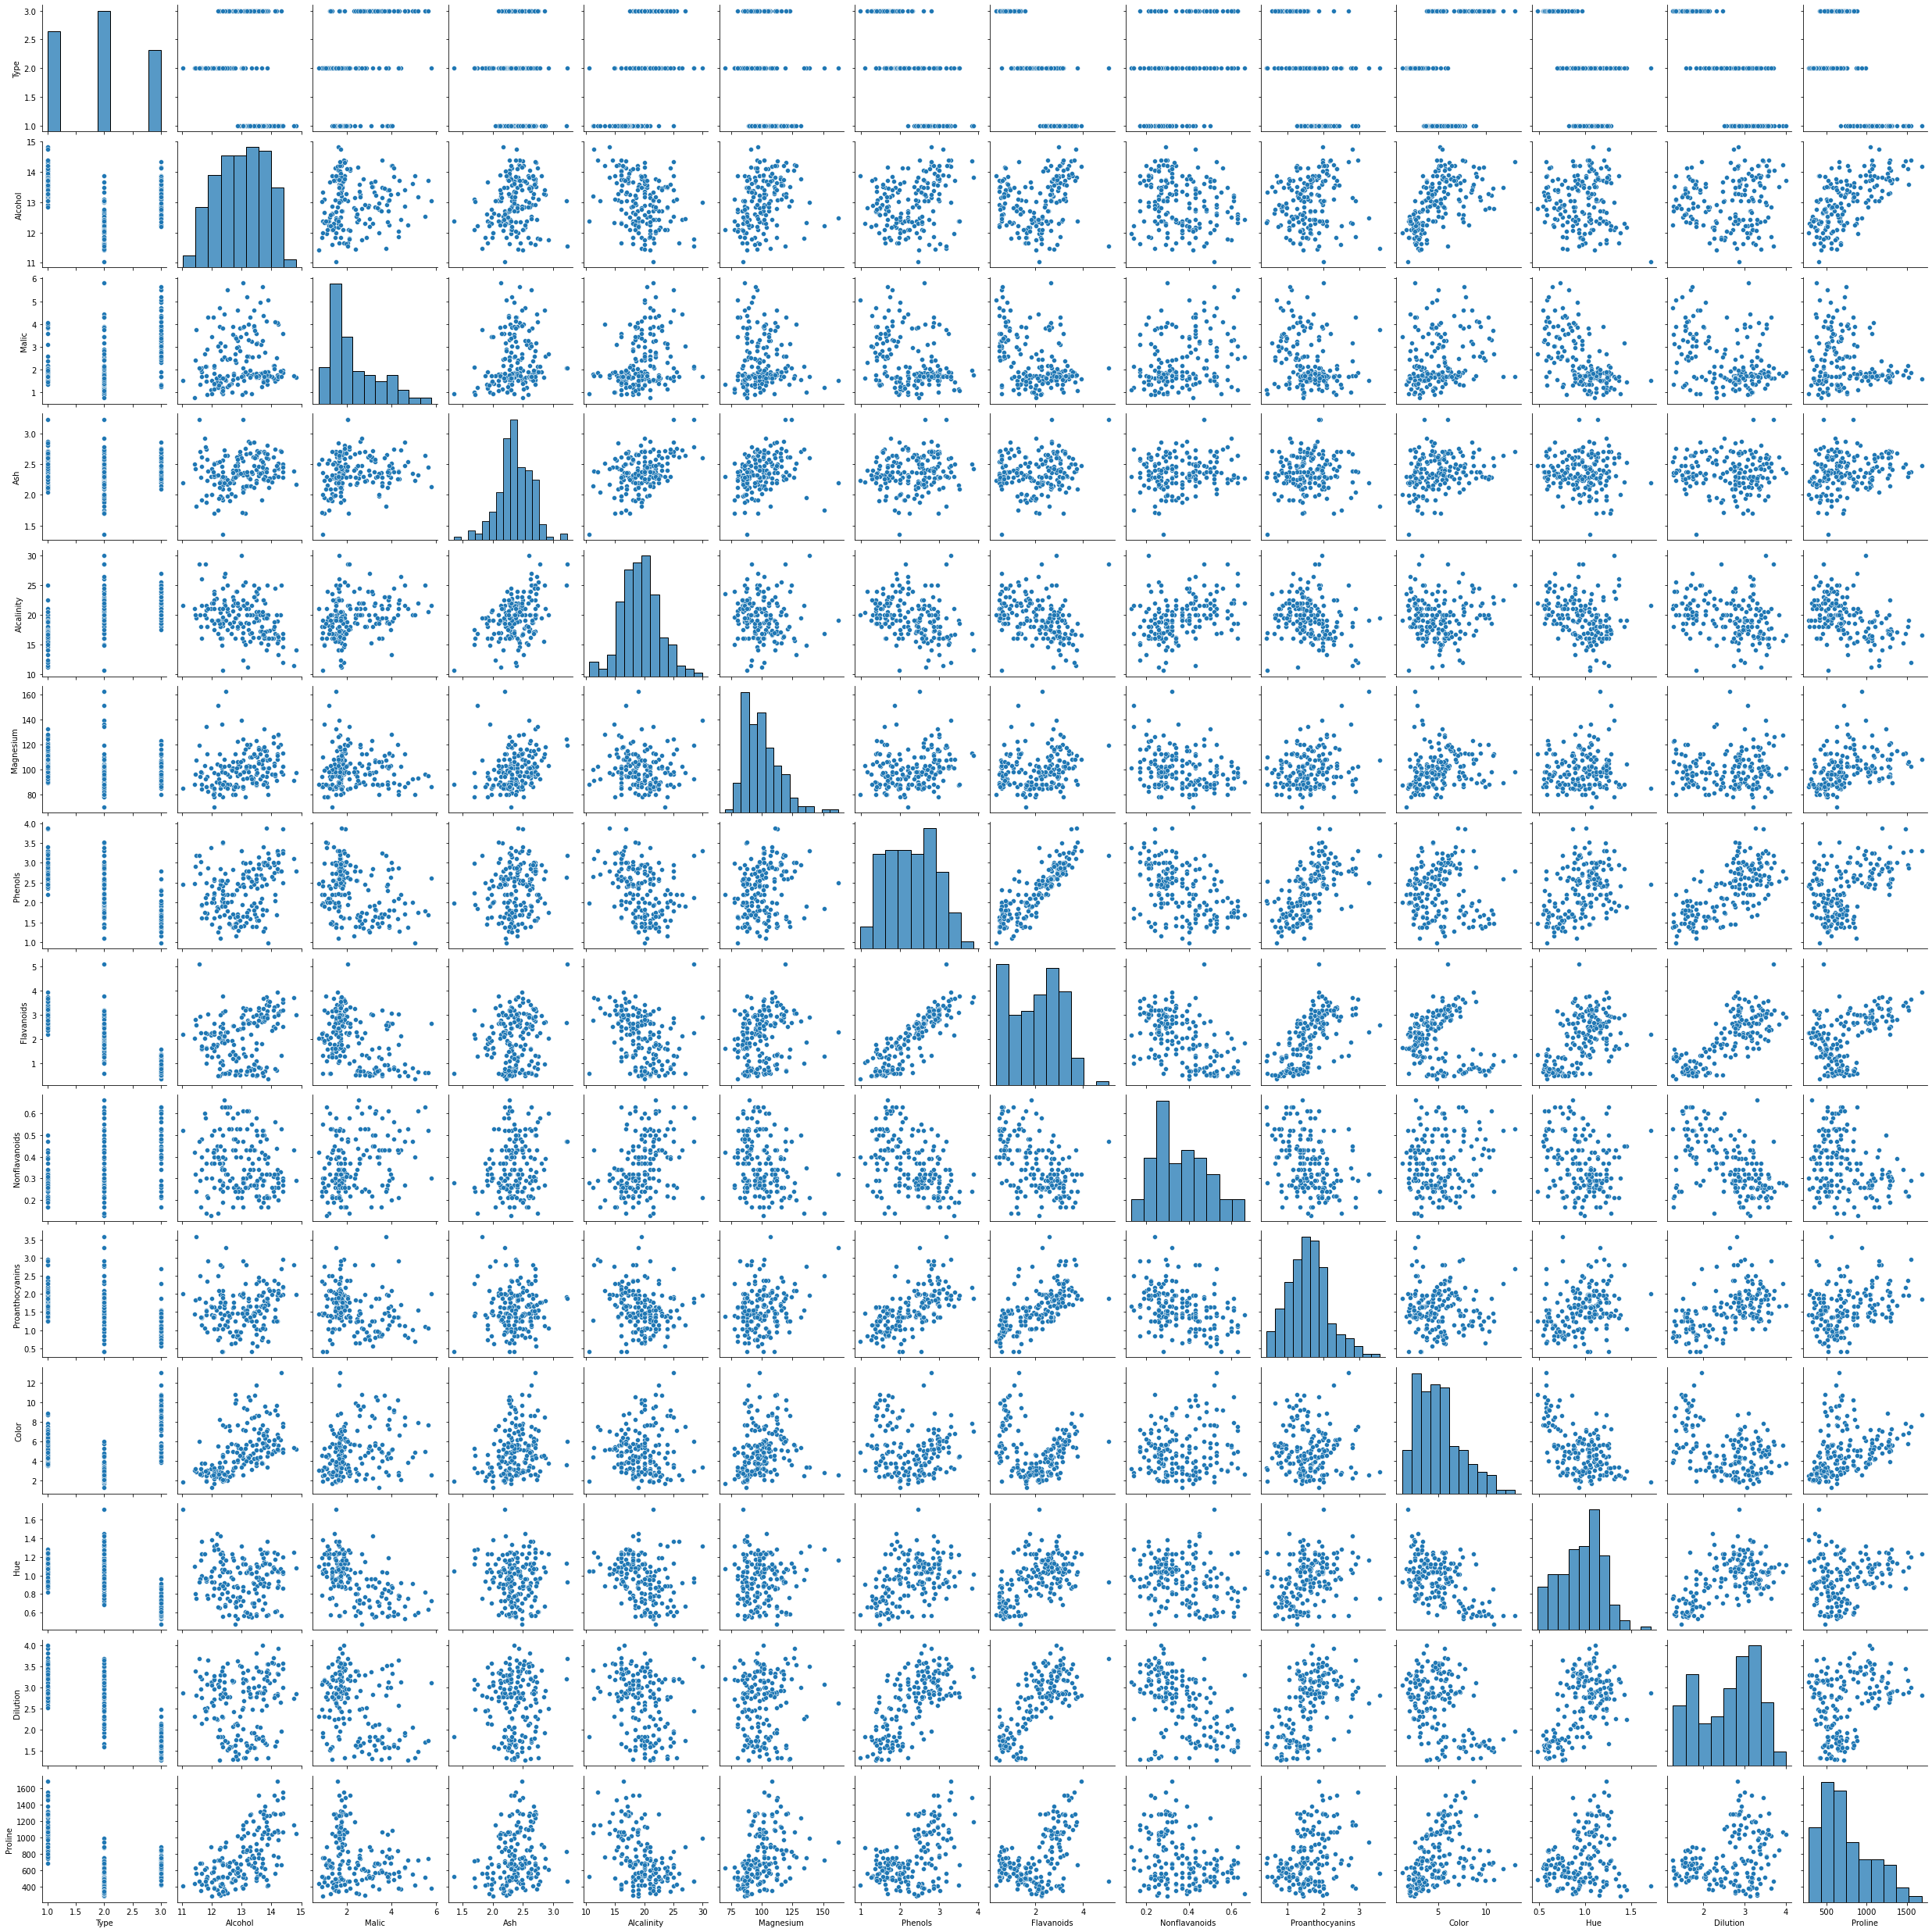

In [4]:
#visualize dataset 
sns.pairplot(df)

<AxesSubplot:>

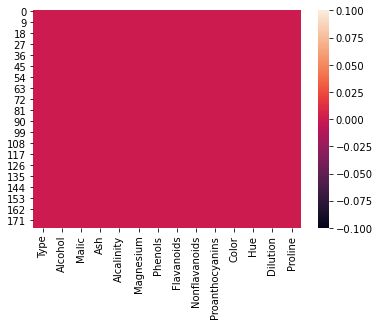

In [5]:
#visualizing null values using heatmap
sns.heatmap(df.isnull())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
#standarize the data set
scaler=StandardScaler()
df_norm=scaler.fit_transform(df)


In [8]:
#implement the PCA 
pca=PCA()
model=pca.fit_transform(df_norm)
model

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [9]:
#percent of information in each pca
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [10]:
#cummulative percent of pca's
var1=np.cumsum(var)
var1

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

In [11]:
#converting into dataframes
DATA=pd.DataFrame(model,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14'])
DATA

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [23]:
pca_values=DATA.iloc[:,0:3]
pca_value=DATA.iloc[:,0:3]


In [13]:
#implementation of hierarchy clustering on 3 pca scores

from sklearn.cluster import AgglomerativeClustering
model2=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward').fit(pca_values)
model2.labels_


array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 3, 3, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 4, 3, 3, 3, 0, 3, 0, 3, 3, 0, 1, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [14]:
pca_values['clust']=model2.labels_
pca_values

<ipython-input-14-4880228ba290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_values['clust']=model2.labels_


,pca1,pca2,pca3,clust
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,4
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,1
174,2.942729,-1.752263,0.207480,1
175,3.027272,-2.756040,-0.940803,1
176,2.755222,-2.293784,-0.550474,1


D:\Installation\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clust', ylabel='count'>

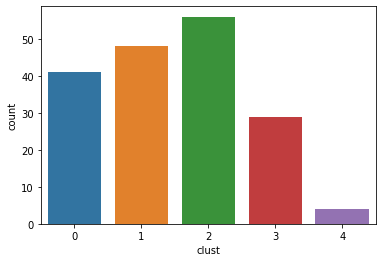

In [15]:
#visualizing clusters
sns.countplot(pca_values['clust'])

In [16]:
#mean values of pca's in each cluster
pca_values.groupby('clust').mean()

,pca1,pca2,pca3
clust,,,
0,0.608630,1.479089,0.729412
1,3.085326,-1.229845,-0.156680
2,-2.647113,-1.010518,-0.208096
3,-0.638700,1.976560,-0.872449
4,-1.572218,-0.585326,3.642297


In [17]:
#now applying KMeans for 3 pca scores

from sklearn.cluster import KMeans

In [24]:
model3=KMeans(n_clusters=5).fit(pca_value)
model3.labels_

array([1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4,
       1, 4, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 3, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 0, 4, 0, 4, 4, 3, 3, 0, 3, 0, 3, 3, 0, 2, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 4, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 4,
       3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [25]:
pca_value['Clust']=model3.labels_
pca_value

<ipython-input-25-638d0c521e85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_value['Clust']=model3.labels_


,pca1,pca2,pca3,Clust
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,4
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,4
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,2
174,2.942729,-1.752263,0.207480,2
175,3.027272,-2.756040,-0.940803,2
176,2.755222,-2.293784,-0.550474,2


D:\Installation\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clust', ylabel='count'>

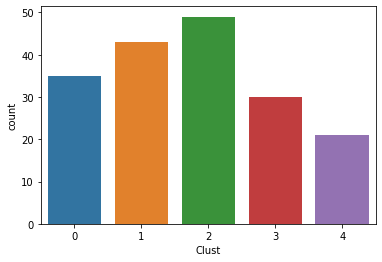

In [26]:
#visualizing clusters
sns.countplot(pca_value['Clust'])

In [27]:
#mean values of pca's in each clusterc
pca_value.groupby('Clust').mean()

,pca1,pca2,pca3
Clust,,,
0,0.533723,1.624259,0.948469
1,-2.819907,-1.132274,-0.527354
2,3.058665,-1.208263,-0.177541
3,-0.262083,1.917218,-1.007337
4,-1.877924,-0.308236,1.352356
